In [156]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [157]:
loan_status_df = pd.read_csv('Loan_Status.csv')

In [158]:
loan_status_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [159]:
loan_status_df.shape

(614, 13)

In [160]:
loan_status_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [161]:
loan_status_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [162]:
loan_status_df.dropna(inplace = True)

In [163]:
loan_status_df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Label Encoding

In [164]:
loan_status_df['Loan_Status'].value_counts()

Y    332
N    148
Name: Loan_Status, dtype: int64

In [165]:
loan_status_df.replace({'Loan_Status': {'Y' : 1, 'N': 0}}, inplace = True)

In [166]:
loan_status_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [167]:
loan_status_df.groupby('Dependents').count()

,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Dependents,,,,,,,,,,,,
0,274,274,274,274,274,274,274,274,274,274,274,274
1,80,80,80,80,80,80,80,80,80,80,80,80
2,85,85,85,85,85,85,85,85,85,85,85,85
3+,41,41,41,41,41,41,41,41,41,41,41,41


In [168]:
#replacing 3+ with 4 sinceit can affect our model
loan_status_df.replace({'Dependents' : {'3+' : '4'}}, inplace = True)

In [169]:
loan_status_df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

Visualisation to understand correlation

<AxesSubplot:>

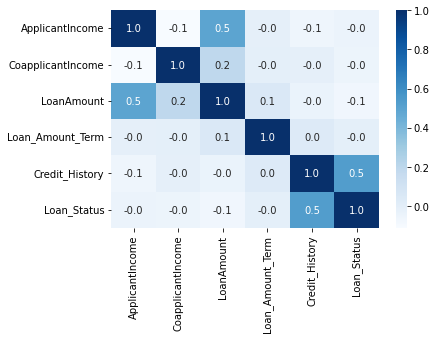

In [170]:
plt.figure(20)
sns.heatmap(loan_status_df.corr(), cbar = True,annot = True, fmt = '.1f', cmap = 'Blues')
#maximum correlation of loan status with credit history 

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

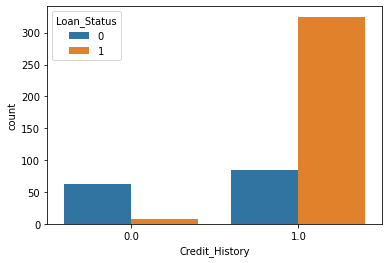

In [171]:
sns.countplot(x = 'Credit_History', hue = 'Loan_Status', data = loan_status_df)
#no loans to people with low credit history

<AxesSubplot:xlabel='Married', ylabel='count'>

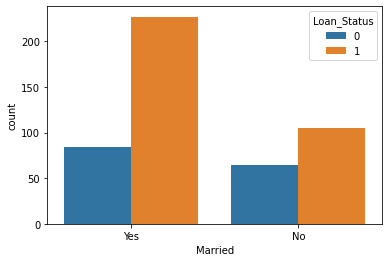

In [172]:
sns.countplot(x = 'Married', hue = 'Loan_Status', data = loan_status_df)

<AxesSubplot:xlabel='Education', ylabel='count'>

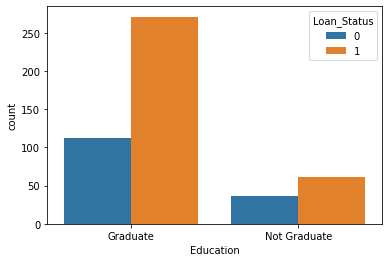

In [173]:
sns.countplot(x = 'Education', hue = 'Loan_Status', data = loan_status_df)

In [174]:
loan_status_df.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0


In [175]:
loan_status_df.replace({'Gender': {'Male': 1, 'Female': 0}, 'Married':{'Yes':1, 'No':0},
                       'Self_Employed':{'Yes':1, 'No':0}, 'Property_Area':{'Rural':0, 'Urban':1, 'Semiurban':2},
                       'Education': {'Graduate':1, 'Not Graduate':0}},
                       inplace = True)

In [176]:
loan_status_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1


Splitting data 

In [177]:
X = loan_status_df.drop(columns = {'Loan_ID', 'Loan_Status'})
Y = loan_status_df['Loan_Status']

We are not standarising since we have categorical features

In [178]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

Training and testing 

In [179]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify = Y, random_state = 2)

In [180]:
classifer = svm.SVC()

In [181]:
classifer.fit(X_train, Y_train)

SVC()

Evaluating the model

In [182]:
X_train_prediction = classifer.predict(X_train)
X_train_acuracy_score = accuracy_score(X_train_prediction, Y_train)

In [183]:
print('Accuracy of training data is:', X_train_acuracy_score)

Accuracy of training data is: 0.6972222222222222


In [184]:
X_test_prediction = classifer.predict(X_test)
X_test_acuracy_score = accuracy_score(X_test_prediction, Y_test)

In [185]:
print('Accuracy of training data is:', X_test_acuracy_score)

Accuracy of training data is: 0.6916666666666667


In [188]:
input_data = (1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0)
input_data_array = np.array(input_data)
input_data_array = input_data_array.reshape(1,-1)
prediction = classifer.predict(input_data_array)
if prediction ==1 :
    print('user is eligible')
else :
    print('user is ineligible')

user is eligible
